In [1]:
# Importing dataset
import pandas as pd
import numpy as np
import itertools
df = pd.read_csv("news.csv")

In [2]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [5]:
# Checking null values
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
df.shape

(6335, 4)

In [7]:
df["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

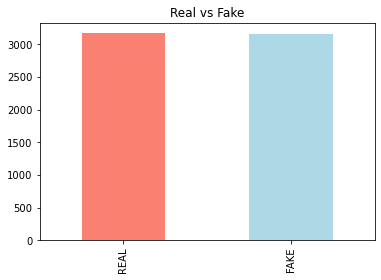

In [8]:
# Plotting a bar graph for labels
import matplotlib.pyplot as plt
%matplotlib inline

df["label"].value_counts().plot(kind="bar", color=["salmon", "lightblue"], title="Real vs Fake");

## Splitting data into training and test sets

In [9]:
# Splitting data into X & y

X = df.drop("label", axis=1)
y = df["label"]

In [10]:
X.shape, y.shape

((6335, 3), (6335,))

In [11]:
X.head()

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [12]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [13]:
# Making train and testing dataset

from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5068, 3), (5068,), (1267, 3), (1267,))

In [16]:
# Importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Initializing a TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)